## This will use 2014 data with matching 2020 data for a paired t test

In [1]:
import pandas as pd

In [2]:
#import datasets
df2012 = pd.read_csv("geo_df2012.csv")
df2020 = pd.read_csv("geo_df2020.csv")

In [3]:
#look at the column names
df2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UNITID     603 non-null    int64  
 1   EFTOTLT    603 non-null    int64  
 2   EFTOTLM    603 non-null    int64  
 3   EFTOTLW    603 non-null    int64  
 4   W/M_Ratio  603 non-null    float64
 5   INSTNM     603 non-null    object 
 6   CITY       603 non-null    object 
 7   STABBR     603 non-null    object 
 8   ZIP        603 non-null    object 
 9   LATITUDE   603 non-null    float64
 10  LONGITUDE  603 non-null    float64
 11  geometry   603 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 56.7+ KB


In [4]:
#rename columns for clarity and to match the 2000 dataset
df2012.rename(columns={'EFTOTLM' : 'MEN', 'EFTOTLW' : 'WOMEN', 'EFTOTLT': 'TOTALSTUDENTS'}, inplace=True)

In [5]:
#add a "percent women" column
df2012['PERCENT_WOMEN'] = df2012['WOMEN']/df2012['TOTALSTUDENTS']
df2012.head()

,UNITID,TOTALSTUDENTS,MEN,WOMEN,W/M_Ratio,INSTNM,CITY,STABBR,ZIP,LATITUDE,LONGITUDE,geometry,PERCENT_WOMEN
0,100654,438,352,86,0.244318,Alabama A & M University,Normal,AL,35762,34.783368,-86.568502,POINT (-86.568502 34.783368),0.196347
1,100663,445,344,101,0.293605,University of Alabama at Birmingham,Birmingham,AL,35294-0110,33.505697,-86.799345,POINT (-86.799345 33.505697),0.226966
2,100706,1758,1405,353,0.251246,University of Alabama in Huntsville,Huntsville,AL,35899,34.724557,-86.640449,POINT (-86.640449 34.724557),0.200796
3,100751,3156,2512,644,0.256369,The University of Alabama,Tuscaloosa,AL,35487-0100,33.211875,-87.545978,POINT (-87.54597800000001 33.211875),0.204056
4,100858,4294,3589,705,0.196434,Auburn University,Auburn,AL,36849,32.599378,-85.488258,POINT (-85.488258 32.599378),0.164183


In [6]:
#examine the dataset column names
df2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UNITID     802 non-null    int64  
 1   EFTOTLT    802 non-null    int64  
 2   EFTOTLM    802 non-null    int64  
 3   EFTOTLW    802 non-null    int64  
 4   W/M_Ratio  802 non-null    float64
 5   INSTNM     802 non-null    object 
 6   CITY       802 non-null    object 
 7   STABBR     802 non-null    object 
 8   ZIP        802 non-null    object 
 9   LATITUDE   802 non-null    float64
 10  LONGITUDE  802 non-null    float64
 11  geometry   802 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 75.3+ KB


In [7]:
#rename columns for clarity and to match the 2000 dataset
df2020.rename(columns={'EFTOTLM' : 'MEN', 'EFTOTLW' : 'WOMEN', 'EFTOTLT': 'TOTALSTUDENTS'}, inplace=True)

In [8]:
#add a "percent women" column
df2020['PERCENT_WOMEN'] = df2020['WOMEN']/df2020['TOTALSTUDENTS']
df2020.head()

,UNITID,TOTALSTUDENTS,MEN,WOMEN,W/M_Ratio,INSTNM,CITY,STABBR,ZIP,LATITUDE,LONGITUDE,geometry,PERCENT_WOMEN
0,100654,5706,4188,1518,0.362464,Alabama A & M University,Normal,AL,35762,34.783368,-86.568502,POINT (-86.568502 34.783368),0.266036
1,100663,7706,5438,2268,0.417065,University of Alabama at Birmingham,Birmingham,AL,35294-0110,33.505697,-86.799345,POINT (-86.799345 33.505697),0.294316
2,100706,28774,22734,6040,0.265681,University of Alabama in Huntsville,Huntsville,AL,35899,34.724557,-86.640449,POINT (-86.640449 34.724557),0.209912
3,100724,558,260,298,1.146154,Alabama State University,Montgomery,AL,36104-0271,32.364317,-86.295677,POINT (-86.295677 32.364317),0.534050
4,100751,43824,34070,9754,0.286293,The University of Alabama,Tuscaloosa,AL,35487-0100,33.211875,-87.545978,POINT (-87.54597800000001 33.211875),0.222572


There are 627 schools in 2012, but 802 in 2020. 
<br>
For a true matched t-test we have to be comparing the same thing.
<br>
I'm going to join the two dataframes with a left join and keep only the matching values.

In [9]:
# perform a left join on the UNITID column
df2012_2020 = pd.merge(df2012, df2020, on= "UNITID", how = 'left')
df2012_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 0 to 602
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UNITID           603 non-null    int64  
 1   TOTALSTUDENTS_x  603 non-null    int64  
 2   MEN_x            603 non-null    int64  
 3   WOMEN_x          603 non-null    int64  
 4   W/M_Ratio_x      603 non-null    float64
 5   INSTNM_x         603 non-null    object 
 6   CITY_x           603 non-null    object 
 7   STABBR_x         603 non-null    object 
 8   ZIP_x            603 non-null    object 
 9   LATITUDE_x       603 non-null    float64
 10  LONGITUDE_x      603 non-null    float64
 11  geometry_x       603 non-null    object 
 12  PERCENT_WOMEN_x  603 non-null    float64
 13  TOTALSTUDENTS_y  546 non-null    float64
 14  MEN_y            546 non-null    float64
 15  WOMEN_y          546 non-null    float64
 16  W/M_Ratio_y      546 non-null    float64
 17  INSTNM_y        

In [10]:
df2012_2020

,UNITID,TOTALSTUDENTS_x,MEN_x,WOMEN_x,W/M_Ratio_x,INSTNM_x,CITY_x,STABBR_x,ZIP_x,LATITUDE_x,...,WOMEN_y,W/M_Ratio_y,INSTNM_y,CITY_y,STABBR_y,ZIP_y,LATITUDE_y,LONGITUDE_y,geometry_y,PERCENT_WOMEN_y
0,100654,438,352,86,0.244318,Alabama A & M University,Normal,AL,35762,34.783368,...,1518.0,0.362464,Alabama A & M University,Normal,AL,35762,34.783368,-86.568502,POINT (-86.568502 34.783368),0.266036
1,100663,445,344,101,0.293605,University of Alabama at Birmingham,Birmingham,AL,35294-0110,33.505697,...,2268.0,0.417065,University of Alabama at Birmingham,Birmingham,AL,35294-0110,33.505697,-86.799345,POINT (-86.799345 33.505697),0.294316
2,100706,1758,1405,353,0.251246,University of Alabama in Huntsville,Huntsville,AL,35899,34.724557,...,6040.0,0.265681,University of Alabama in Huntsville,Huntsville,AL,35899,34.724557,-86.640449,POINT (-86.640449 34.724557),0.209912
3,100751,3156,2512,644,0.256369,The University of Alabama,Tuscaloosa,AL,35487-0100,33.211875,...,9754.0,0.286293,The University of Alabama,Tuscaloosa,AL,35487-0100,33.211875,-87.545978,POINT (-87.54597800000001 33.211875),0.222572
4,100858,4294,3589,705,0.196434,Auburn University,Auburn,AL,36849,32.599378,...,10610.0,0.251792,Auburn University,Auburn,AL,36849,32.599378,-85.488258,POINT (-85.488258 32.599378),0.201145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,443410,24,19,5,0.263158,DigiPen Institute of Technology,Redmond,WA,98052,47.688710,...,76.0,0.238994,DigiPen Institute of Technology,Redmond,WA,98052,47.688710,-122.150603,POINT (-122.150603 47.68871),0.192893
599,443562,81,27,54,2.000000,Dewey University-Hato Rey,Hato Rey,PR,910,18.417614,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
600,445188,948,781,167,0.213828,University of California-Merced,Merced,CA,95343-5603,37.366237,...,4578.0,0.259700,University of California-Merced,Merced,CA,95343-5603,37.366237,-120.424944,POINT (-120.424944 37.366237),0.206160
601,456490,79,65,14,0.215385,Polytechnic University of Puerto Rico-Orlando,Orlando,FL,32825,28.551580,...,412.0,0.426501,Polytechnic University of Puerto Rico-Orlando,Orlando,FL,32825,28.551580,-81.253943,POINT (-81.25394300000001 28.55158),0.298984


In [11]:
# drop any rows with an NA in them - this will eliminate any information from 2012 that does not
# have a pair in 2020 and vice versa
df2012_2020_1 = df2012_2020.dropna(axis = 0)

In [12]:
df2012_2020_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 0 to 601
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UNITID           546 non-null    int64  
 1   TOTALSTUDENTS_x  546 non-null    int64  
 2   MEN_x            546 non-null    int64  
 3   WOMEN_x          546 non-null    int64  
 4   W/M_Ratio_x      546 non-null    float64
 5   INSTNM_x         546 non-null    object 
 6   CITY_x           546 non-null    object 
 7   STABBR_x         546 non-null    object 
 8   ZIP_x            546 non-null    object 
 9   LATITUDE_x       546 non-null    float64
 10  LONGITUDE_x      546 non-null    float64
 11  geometry_x       546 non-null    object 
 12  PERCENT_WOMEN_x  546 non-null    float64
 13  TOTALSTUDENTS_y  546 non-null    float64
 14  MEN_y            546 non-null    float64
 15  WOMEN_y          546 non-null    float64
 16  W/M_Ratio_y      546 non-null    float64
 17  INSTNM_y        

Now we have a dataset containing only the universities with information in both 2012 and 2020.
The X columns represent 2012 and Y columns represent 2020 data.

Lets perform the dependent T test to see if the means are the same.

In [13]:
#import needed packages
from scipy import stats
import numpy as np

Frist lets check for normality for the percentages of women at each time point.

<AxesSubplot:>

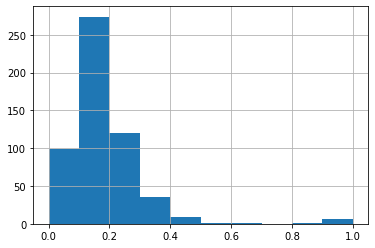

In [14]:
df2012_2020_1['PERCENT_WOMEN_x'].hist()

<AxesSubplot:>

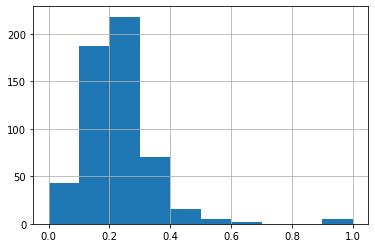

In [15]:
df2012_2020_1['PERCENT_WOMEN_y'].hist()

Both have a relatively normal shape here. I'm going to proceed with the test, and then compare the test to one with transformed data to see if there is a difference in the outcome.

In [16]:
#run a matched t test
stats.ttest_rel(df2012_2020_1['PERCENT_WOMEN_x'], df2012_2020_1['PERCENT_WOMEN_y'])

Ttest_relResult(statistic=-10.422210547122273, pvalue=2.575110028153809e-23)

The results are significant (p < .05) therefore the means are different.

There is a change in mean percentage of women from 2012 to 2020.

### Now lets double check the result with transformed data

In [17]:
#create a column of transformed "percent women x" data
df2012_2020_1['PERCENT_WOMEN_x_SQRT'] = np.sqrt(df2012_2020_1['PERCENT_WOMEN_x'])

C:\Users\ering\AppData\Local\Temp\ipykernel_26920\1451299967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2012_2020_1['PERCENT_WOMEN_x_SQRT'] = np.sqrt(df2012_2020_1['PERCENT_WOMEN_x'])


<AxesSubplot:>

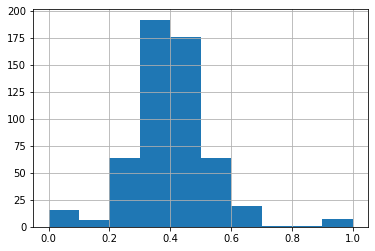

In [18]:
#look at the transformed data for normality
df2012_2020_1['PERCENT_WOMEN_x_SQRT'].hist()

Much more normally distributed thi time - we'll keep this.

In [19]:
#create a column of transformed "percent women y" data
df2012_2020_1['PERCENT_WOMEN_y_SQRT'] = np.sqrt(df2012_2020_1['PERCENT_WOMEN_y'])

C:\Users\ering\AppData\Local\Temp\ipykernel_26920\2016420231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2012_2020_1['PERCENT_WOMEN_y_SQRT'] = np.sqrt(df2012_2020_1['PERCENT_WOMEN_y'])


<AxesSubplot:>

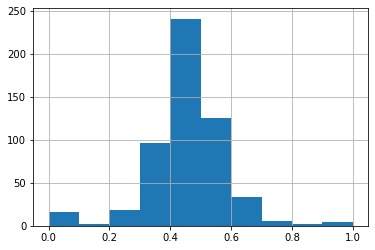

In [20]:
#look at transformed data for normality
df2012_2020_1['PERCENT_WOMEN_y_SQRT'].hist()

This looks much more normal as well

In [21]:
# perform matched t test on transformed data to see if result is different from result from un-transformed data
stats.ttest_rel(df2012_2020_1['PERCENT_WOMEN_x_SQRT'], df2012_2020_1['PERCENT_WOMEN_y_SQRT'])

Ttest_relResult(statistic=-9.325892378307188, pvalue=2.736506390435323e-19)

The test is still significant - the means are different

### Lets look at means and see what's going on here

In [22]:
mean2012 = df2012_2020_1['PERCENT_WOMEN_x'].mean()
mean2012

0.18163738263474943

In [23]:
mean2020 = df2012_2020_1['PERCENT_WOMEN_y'].mean()
mean2020

0.22665314858237215

In 2012 the Mean percentage of women was 18.2%. It had risen to 22.7% by 2020. This is not a large change over 8 years, however it represents a larger change over 8 years than had occurred over the previous 12.

Is the subset of the 2020 data matched to the 2012 data representative of the whole of the 2020 data?
Check and see if the means are the same or different...

In [24]:
df2020['PERCENT_WOMEN'].mean()

0.2256101570108995

In [25]:
from scipy.stats import ttest_ind

In [26]:
ttest_ind(df2012_2020_1['PERCENT_WOMEN_y'], df2020['PERCENT_WOMEN'])

Ttest_indResult(statistic=0.14261306590938524, pvalue=0.8866171221273387)

The pvalue is not significant - the means are not different.
We can say that the subset of the 2020 data matched to the 2012 data is representative of the whole of the 2020 dataset.